# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#math will allow you to convert Kelvin Temperature to Farhenheit
import math

# Import API key
from config import api_key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [3]:
#Selects 10 cities out of the 500 to do the analysis for testing
cities = cities[0:10]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#save url
url = "http://api.openweathermap.org/data/2.5/weather?"

#Creates variable city, required to make city url work, By City Name in Open API Weather
city = "London"
#Creates longitude and latitude variables, By Geographic Coordinates, required for query url if you want to look up by coord
longitude = "-122.08"
latitude = "37.39"
#Creates city id, required for cityid_url, By City ID, if you want to look up by city id
cityid = "2172797"

city_url = url + "appid=" + api_key + "&q=" + city
print(city_url)

http://api.openweathermap.org/data/2.5/weather?appid=a3c8d7504aed974d2adda6bbc52d7a80&q=London


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create list of dictionaries for df
#Collaborated with Tara Boole on for loop
dictionarylist=[]
for city in cities:
    try:
        city_url = url + "appid=" + api_key + "&q=" + city
        print(city)
#queries the url and converts to json
        weather = requests.get(city_url).json()
#Retrieves variables in JSON file
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        #Store temperature as Kelvin, code obtained from https://javascriptbootcamp.tech/blog/158860/kelvin-to-fahrenheit-python
        kelvin_temp = weather["main"]['temp_max']
        #Convert Kelvin temp to Celcius
        celcisus_temp = kelvin_temp - 273.15
        #Convert Celcius to Farenheit
        fahrenheit_temp = celcisus_temp * ( 9 / 5 ) + 32
        humidity = weather["main"]['humidity']
        clouds = weather["clouds"]['all']
        wind = weather["wind"]['speed']
        dictionarylist.append({"City":city, "Latitude":latitude, "Longitude":longitude, "Kelvin Temp":kelvin_temp, 
                               #"Celcius Temp":celcius_temp, "Farenheight Temp":farenheight_temp,
                               "Humidity":humidity, "Clouds":clouds, "Wind":wind})
        print(weather)
    except:
        print("city not found")
        pass
#saves the entire dictionary instead of just the last value in the loop
dictionarylist

matay
{'coord': {'lon': 30.78, 'lat': 28.42}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 301.45, 'feels_like': 293.55, 'temp_min': 301.45, 'temp_max': 301.45, 'pressure': 1010, 'humidity': 21, 'sea_level': 1010, 'grnd_level': 1006}, 'wind': {'speed': 9.36, 'deg': 319}, 'clouds': {'all': 21}, 'dt': 1587050979, 'sys': {'country': 'EG', 'sunrise': 1587007803, 'sunset': 1587054164}, 'timezone': 7200, 'id': 352628, 'name': 'Maţāy', 'cod': 200}
bambous virieux
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 297.1, 'feels_like': 296.21, 'temp_min': 297.04, 'temp_max': 297.15, 'pressure': 1018, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1587050979, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1587003614, 'sunset': 1587045405}

[{'City': 'matay',
  'Latitude': 28.42,
  'Longitude': 30.78,
  'Kelvin Temp': 301.45,
  'Humidity': 21,
  'Clouds': 21,
  'Wind': 9.36},
 {'City': 'bambous virieux',
  'Latitude': -20.34,
  'Longitude': 57.76,
  'Kelvin Temp': 297.15,
  'Humidity': 94,
  'Clouds': 75,
  'Wind': 8.7},
 {'City': 'olinda',
  'Latitude': -8.01,
  'Longitude': -34.86,
  'Kelvin Temp': 302.15,
  'Humidity': 83,
  'Clouds': 75,
  'Wind': 4.1},
 {'City': 'qaanaaq',
  'Latitude': 77.48,
  'Longitude': -69.36,
  'Kelvin Temp': 263.76,
  'Humidity': 82,
  'Clouds': 74,
  'Wind': 2.5},
 {'City': 'vanimo',
  'Latitude': -2.67,
  'Longitude': 141.3,
  'Kelvin Temp': 300.44,
  'Humidity': 74,
  'Clouds': 5,
  'Wind': 0.66},
 {'City': 'port elizabeth',
  'Latitude': -33.92,
  'Longitude': 25.57,
  'Kelvin Temp': 292.15,
  'Humidity': 68,
  'Clouds': 4,
  'Wind': 5.7},
 {'City': 'castro',
  'Latitude': -24.79,
  'Longitude': -50.01,
  'Kelvin Temp': 295.02,
  'Humidity': 24,
  'Clouds': 0,
  'Wind': 1.04}]

In [6]:
#Converts dictionary to dataframe
df=pd.DataFrame(dictionarylist)
df

,City,Latitude,Longitude,Kelvin Temp,Humidity,Clouds,Wind
0,matay,28.42,30.78,301.45,21,21,9.36
1,bambous virieux,-20.34,57.76,297.15,94,75,8.70
2,olinda,-8.01,-34.86,302.15,83,75,4.10
3,qaanaaq,77.48,-69.36,263.76,82,74,2.50
4,vanimo,-2.67,141.30,300.44,74,5,0.66
5,port elizabeth,-33.92,25.57,292.15,68,4,5.70
6,castro,-24.79,-50.01,295.02,24,0,1.04


In [7]:
#Convert Kelvin Temp
#Code obtained from https://javascriptbootcamp.tech/blog/158860/kelvin-to-fahrenheit-python
df["Kelvin Temp"] = df["Kelvin Temp"]-273.15
df["Kelvin Temp"] = df["Kelvin Temp"] * (9/5) + 32
df.columns = ['City', 'Latitude', 'Longitude', "Temp_F", "Humidity", "Clouds", "Wind"]

#df["FarenheitTemp"] = df['CelciusTemp'] * ( 9 / 5 ) + 32
#df['FarenheitTemp'] = FarenheightTemp
df

,City,Latitude,Longitude,Temp_F,Humidity,Clouds,Wind
0,matay,28.42,30.78,82.940,21,21,9.36
1,bambous virieux,-20.34,57.76,75.200,94,75,8.70
2,olinda,-8.01,-34.86,84.200,83,75,4.10
3,qaanaaq,77.48,-69.36,15.098,82,74,2.50
4,vanimo,-2.67,141.30,81.122,74,5,0.66
5,port elizabeth,-33.92,25.57,66.200,68,4,5.70
6,castro,-24.79,-50.01,71.366,24,0,1.04


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Run with all of the cities when you make the charts****Remember.....

In [9]:
#  Get the indices of cities that have humidity over 100%.
df[df["Humidity"] > 0.5]
df


,City,Latitude,Longitude,Temp_F,Humidity,Clouds,Wind
0,matay,28.42,30.78,82.940,21,21,9.36
1,bambous virieux,-20.34,57.76,75.200,94,75,8.70
2,olinda,-8.01,-34.86,84.200,83,75,4.10
3,qaanaaq,77.48,-69.36,15.098,82,74,2.50
4,vanimo,-2.67,141.30,81.122,74,5,0.66
5,port elizabeth,-33.92,25.57,66.200,68,4,5.70
6,castro,-24.79,-50.01,71.366,24,0,1.04


In [10]:
# Create Northern and Southern Hemisphere DataFrames
df['Hemisphere'] = ["Northern" if Longitude > 0 else 800 for Longitude in df['Humidity']]
df
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

              City  Latitude  Longitude  Temp_F  Humidity  Clouds  Wind  \
0            matay     28.42      30.78  82.940        21      21  9.36   
1  bambous virieux    -20.34      57.76  75.200        94      75  8.70   
2           olinda     -8.01     -34.86  84.200        83      75  4.10   
3          qaanaaq     77.48     -69.36  15.098        82      74  2.50   
4           vanimo     -2.67     141.30  81.122        74       5  0.66   
5   port elizabeth    -33.92      25.57  66.200        68       4  5.70   
6           castro    -24.79     -50.01  71.366        24       0  1.04   

  Hemisphere  
0   Northern  
1   Northern  
2   Northern  
3   Northern  
4   Northern  
5   Northern  
6   Northern  


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature')

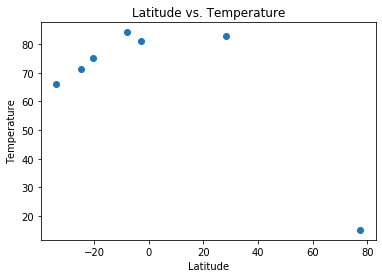

In [21]:
#Creates a scatter to compare Latitude vs. Temperature.  If you have time, fix this temperature if wrong.
plt.scatter(df.Latitude,df.Temp_F)
#Creates labels
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")


## Latitude vs. Humidity Plot

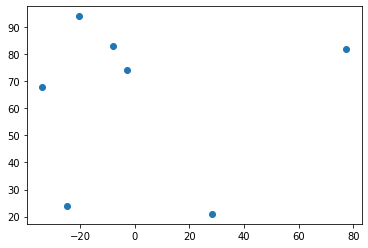

In [15]:
#Creates a scatter to compare latitude vs. humidity
plt.scatter(df.Latitude,df.Humidity)
#Creates labels
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

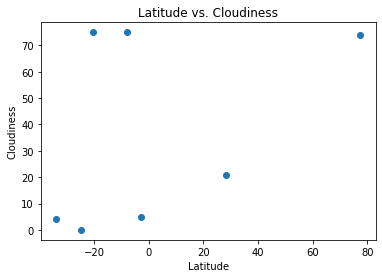

In [22]:
#Creates a scatter to compare latitude vs. cloudiness
plt.scatter(df.Latitude,df.Clouds)
#Creates labels
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

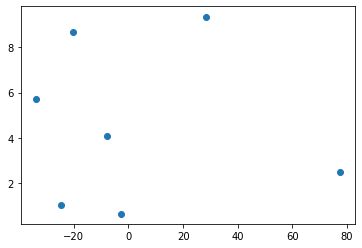

In [17]:
#Creates a scatter to compare latitude vs. wind speed
plt.scatter(df.Latitude,df.Wind)
#Creates labels
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression